In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.optimize as optimization
import csv
from datetime import datetime

In [4]:

dataset = pd.read_csv("world_data.csv")
dataset.head(10)


,date,deaths,confirmed,recovered,CFR_1,CFR_2
0,2020-01-21,17,555,28,0.377778,0.030631
1,2020-01-22,35,1208,58,0.376344,0.028974
2,2020-01-23,44,1594,66,0.400000,0.027604
3,2020-01-24,68,2379,75,0.475524,0.028583
4,2020-01-25,98,3556,91,0.518519,0.027559
5,2020-01-26,138,5044,113,0.549801,0.027359
6,2020-01-27,213,8504,168,0.559055,0.025047
7,2020-01-28,264,11743,233,0.531187,0.022481
8,2020-01-29,304,14400,269,0.530541,0.021111
9,2020-01-30,384,18160,365,0.512684,0.021145


In [5]:
deathRate = dataset['CFR_2'].mean()
deathRate


0.040063711025080904

In [6]:
CFR = dataset['CFR_1'].mean()
CFR

0.20045849921596015

In [7]:
def base_seir_model(init_vals, params, t,N):
    S_0, E_0, I_0R, I_0D, R_0 , D_0 = init_vals
    S, E, IR, ID, R, D = [S_0], [E_0], [I_0R],[I_0D], [R_0],[D_0]
    beta, delta, gammaR, gammaD, miu = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - ((beta*S[-1]*(IR[-1]+ID[-1]))/N)*dt
        next_E = E[-1] + ((beta*S[-1]*(IR[-1]+ID[-1]))/N - delta*E[-1])*dt
        next_IR = IR[-1] + (delta*(1-miu)*E[-1] - gammaR*IR[-1])*dt
        next_ID = ID[-1] + (delta*miu*E[-1] - gammaD*ID[-1])*dt
        next_R = R[-1] + (gammaR*IR[-1])*dt
        next_D = D[-1] + (gammaD*ID[-1])*dt
        S.append(next_S)
        E.append(next_E)
        IR.append(next_IR)
        ID.append(next_ID)
        R.append(next_R)
        D.append(next_D)
    #return np.stack([S, E, IR, ID, R, D]).T

    return pd.DataFrame.from_dict({'Time':list(range(len(S))),
            'Susceptible':S, 'Exposed': E, 'InfectedR':IR,'InfectedD':ID, 'Recovered': R, 'Death':D},orient='index').transpose()

In [39]:
# Define parameters
t_max = 500
dt = 1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
print(t)
N = 7780484886
E0 = 2247084
R0 = 792581
D0 = 197115
ID0 = 140099
IR0 = 421673
S0 = N-E0-IR0-ID0-R0-D0
init_vals = S0,E0,IR0,ID0,R0,D0

beta = 0.203
delta = 1/7
gammaR = 0.05517
gammaD = 0.040664
miu = 0.02 #0.20046
params = beta, delta, gammaR, gammaD, miu 
# Run simulation
results = base_seir_model(init_vals, params, t , N)



[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [40]:
print(results)

      Time   Susceptible       Exposed     InfectedR      InfectedD  \
0      0.0  7.776686e+09  2.247084e+06  4.216730e+05  140099.000000   
1      1.0  7.776572e+09  2.040056e+06  7.130011e+05  140822.254264   
2      2.0  7.776399e+09  1.921858e+06  9.592726e+05  140924.589660   
3      3.0  7.776176e+09  1.870530e+06  1.175410e+06  140685.056249   
4      4.0  7.775909e+09  1.870331e+06  1.372437e+06  140308.610508   
..     ...           ...           ...           ...            ...   
496  496.0  1.962440e+08  7.416172e+00  1.011660e+02      42.543037   
497  497.0  1.962440e+08  7.092536e+00  9.662290e+01      40.834256   
498  498.0  1.962440e+08  6.783123e+00  9.228517e+01      39.194036   
499  499.0  1.962440e+08  6.487303e+00  8.814343e+01      37.619630   
500  500.0  1.962440e+08  6.204476e+00  8.418878e+01      36.108401   

        Recovered         Death  
0    7.925810e+05  1.971150e+05  
1    8.158447e+05  2.028120e+05  
2    8.551810e+05  2.085384e+05  
3    9.0810

In [41]:
results['totalcase'] = results['Exposed'] + results['InfectedR'] + results['InfectedD']

In [42]:
print(results)

      Time   Susceptible       Exposed     InfectedR      InfectedD  \
0      0.0  7.776686e+09  2.247084e+06  4.216730e+05  140099.000000   
1      1.0  7.776572e+09  2.040056e+06  7.130011e+05  140822.254264   
2      2.0  7.776399e+09  1.921858e+06  9.592726e+05  140924.589660   
3      3.0  7.776176e+09  1.870530e+06  1.175410e+06  140685.056249   
4      4.0  7.775909e+09  1.870331e+06  1.372437e+06  140308.610508   
..     ...           ...           ...           ...            ...   
496  496.0  1.962440e+08  7.416172e+00  1.011660e+02      42.543037   
497  497.0  1.962440e+08  7.092536e+00  9.662290e+01      40.834256   
498  498.0  1.962440e+08  6.783123e+00  9.228517e+01      39.194036   
499  499.0  1.962440e+08  6.487303e+00  8.814343e+01      37.619630   
500  500.0  1.962440e+08  6.204476e+00  8.418878e+01      36.108401   

        Recovered         Death     totalcase  
0    7.925810e+05  1.971150e+05  2.808856e+06  
1    8.158447e+05  2.028120e+05  2.893879e+06  
2  

Maximum infected case:  2974687956


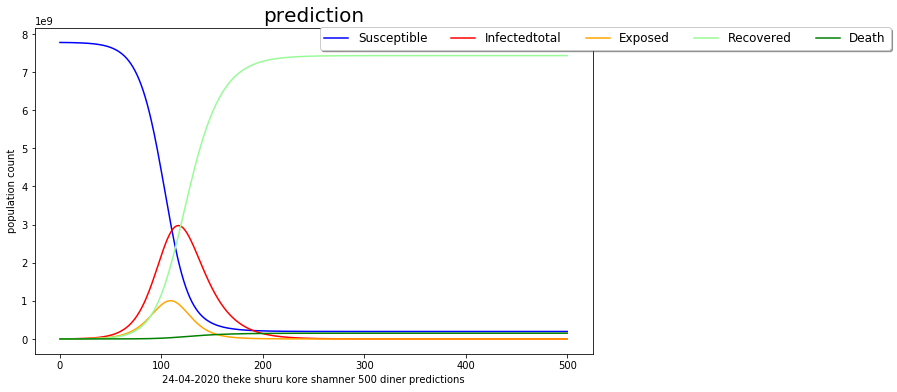

In [43]:

print("Maximum infected case: ",format(int(max(results['totalcase']))))
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(results['Time'], results['Susceptible'], color='blue')
plt.plot(results['Time'], results['totalcase'], color='red')
plt.plot(results['Time'], results['Exposed'], color='orange')
plt.plot(results['Time'], results['Recovered'], color='palegreen')
plt.plot(results['Time'], results['Death'], color='green')
       
plt.xlabel('24-04-2020 theke shuru kore shamner 500 diner predictions')
plt.ylabel('population count')
plt.legend(['Susceptible','Infectedtotal','Exposed', 'Recovered', 'Death'], prop={'size': 12}, bbox_to_anchor=(0.5, 1.02), ncol=6, fancybox=True, shadow=True)
plt.title('prediction', fontsize = 20)
plt.show()

In [44]:
results.head(30)

,Time,Susceptible,Exposed,InfectedR,InfectedD,Recovered,Death,totalcase
0,0.0,7.776686e+09,2.247084e+06,4.216730e+05,140099.000000,7.925810e+05,197115.000000,2.808856e+06
1,1.0,7.776572e+09,2.040056e+06,7.130011e+05,140822.254264,8.158447e+05,202811.985736,2.893879e+06
2,2.0,7.776399e+09,1.921858e+06,9.592726e+05,140924.589660,8.551810e+05,208538.381883,3.022056e+06
3,3.0,7.776176e+09,1.870530e+06,1.175410e+06,140685.056249,9.081040e+05,214268.939397,3.186625e+06
4,4.0,7.775909e+09,1.870331e+06,1.372437e+06,140308.610508,9.729514e+05,219989.756525,3.383076e+06
5,5.0,7.775602e+09,1.910047e+06,1.558566e+06,139946.903165,1.048669e+06,225695.265862,3.608560e+06
6,6.0,7.775257e+09,1.981765e+06,1.739986e+06,139713.380191,1.134655e+06,231386.066733,3.861465e+06
7,7.0,7.774876e+09,2.079978e+06,1.921438e+06,139694.261038,1.230650e+06,237067.371625,4.141111e+06
8,8.0,7.774458e+09,2.200947e+06,2.106629e+06,139956.528882,1.336656e+06,242747.899056,4.447533e+06
9,9.0,7.774002e+09,2.342230e+06,2.298539e+06,140553.756145,1.452878e+06,248439.091346,4.781323e+06
